# EMAIL SPAM CLASSIFIER

#### 1.IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('C:/Users/user/Downloads/Spam Project/spam.csv',encoding='latin1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1553,ham,Ok how you dear. Did you call chechi,NaN,NaN,NaN
5014,ham,I think the other two still need to get cash b...,NaN,NaN,NaN
3813,ham,Can. Dunno wat to get 4 her...,NaN,NaN,NaN
5509,ham,Lol they were mad at first but then they woke ...,NaN,NaN,NaN
3625,ham,Yeah right! I'll bring my tape measure fri!,NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


###### Drop last  three columns

In [5]:
df.drop(columns=['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'],inplace=True)
df.sample(5)

,v1,v2
1370,ham,Hope you are feeling great. Pls fill me in. Ab...
4386,ham,S.i'm watching it in live..
1172,ham,Happy new years melody!
5349,ham,I'm home...
625,ham,"Haha good to hear, I'm officially paid and on ..."


In [6]:
df.rename(columns={'v1' : 'label' , 'v2' : 'text'},inplace=True)
df.sample(5)

,label,text
5375,ham,I cant pick the phone right now. Pls send a me...
3020,ham,Am in film ill call you later.
2565,ham,I told her I had a Dr appt next week. She thin...
5297,ham,My darling sister. How are you doing. When's s...
588,ham,Ya srsly better than yi tho


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
df['label'] = encoder.fit_transform(df['label'])

In [9]:
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.describe(include='all')

,label,text
count,5572.000000,5572
unique,NaN,5169
top,NaN,"Sorry, I'll call later"
freq,NaN,30
mean,0.134063,NaN
std,0.340751,NaN
min,0.000000,NaN
25%,0.000000,NaN
50%,0.000000,NaN
75%,0.000000,NaN


###### missing values

In [11]:
df.isnull().sum()

label    0
text     0
dtype: int64

###### check for duplicate values

In [12]:
df.duplicated().sum()

403

###### remove duplicates

In [13]:
df=df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

#### 2. EDA

In [15]:
df.shape

(5169, 2)

In [16]:
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df.columns

Index(['label', 'text'], dtype='object')

In [18]:
df.dtypes

label     int32
text     object
dtype: object

In [19]:
df.iterrows

<bound method DataFrame.iterrows of       label                                               text
0         0  Go until jurong point, crazy.. Available only ...
1         0                      Ok lar... Joking wif u oni...
2         1  Free entry in 2 a wkly comp to win FA Cup fina...
3         0  U dun say so early hor... U c already then say...
4         0  Nah I don't think he goes to usf, he lives aro...
...     ...                                                ...
5567      1  This is the 2nd time we have tried 2 contact u...
5568      0              Will Ì_ b going to esplanade fr home?
5569      0  Pity, * was in mood for that. So...any other s...
5570      0  The guy did some bitching but I acted like i'd...
5571      0                         Rofl. Its true to its name

[5169 rows x 2 columns]>

In [20]:
df['label'].value_counts()

0    4516
1     653
Name: label, dtype: int64

[Text(0, 0, 'ham'), Text(1, 0, 'spam')]

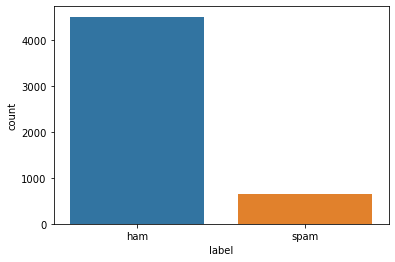

In [21]:
class_names=["ham","spam"]
ax=sns.countplot(x='label',data=df)
ax.set_xticklabels(class_names)

In [22]:
df['text_len_by_words'] = df['text'].apply(lambda t: len(t.split()))
min_len_word, max_len_word = df['text_len_by_words'].min(),df['text_len_by_words'].max()
print(min_len_word,max_len_word)

1 171


<AxesSubplot:xlabel='text_len_by_words', ylabel='Count'>

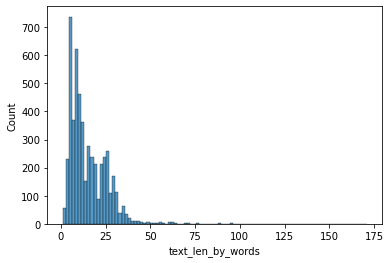

In [23]:
sns.histplot(df['text_len_by_words'])

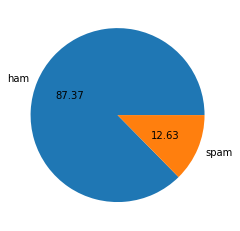

In [24]:
plt.pie(df['label'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

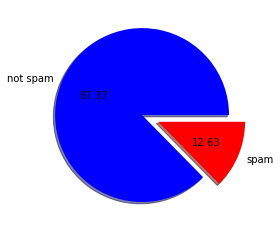

In [25]:
plt.pie(df['label'].value_counts(), labels=['not spam' , 'spam'],autopct="%0.2f" , shadow=True,explode=[0, 0.2], colors=["blue" , "red"])
plt.show()

In [26]:
import nltk

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
df['num_characters']=df['text'].apply(len)

imbalanced data

In [29]:
df.head()

,label,text,text_len_by_words,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",20,111
1,0,Ok lar... Joking wif u oni...,6,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,155
3,0,U dun say so early hor... U c already then say...,11,49
4,0,"Nah I don't think he goes to usf, he lives aro...",13,61


In [30]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [31]:
df.head()

,label,text,text_len_by_words,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",20,111,24
1,0,Ok lar... Joking wif u oni...,6,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,37
3,0,U dun say so early hor... U c already then say...,11,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",13,61,15


In [32]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,label,text,text_len_by_words,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",20,111,24,2
1,0,Ok lar... Joking wif u oni...,6,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,37,2
3,0,U dun say so early hor... U c already then say...,11,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",13,61,15,1


In [33]:
df[['num_characters' , 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [34]:
round(df.groupby('label').agg([np.mean,np.min,np.max]))

text_len_by_words           num_characters           num_words       \
                   mean amin amax           mean amin amax      mean amin   
label                                                                       
0                  14.0    1  171           70.0    2  910      17.0    1   
1                  24.0    2   35          138.0   13  224      28.0    2   

           num_sentences            
      amax          mean amin amax  
label                               
0      220           2.0    1   28  
1       46           3.0    1    8

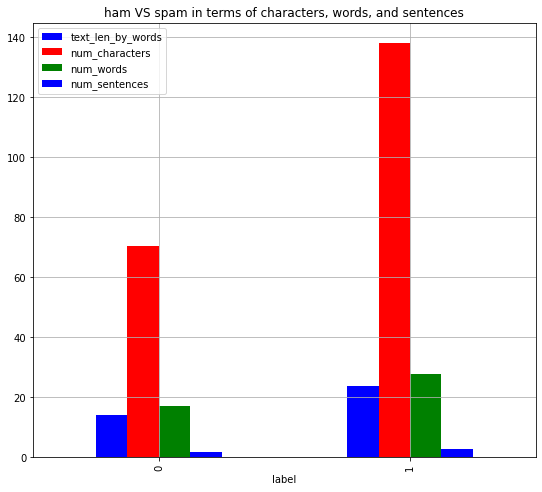

In [35]:
avg = df.groupby('label').mean()
avg.plot(kind='bar',figsize=(9,8),title='ham VS spam in terms of characters, words, and sentences' , color=['blue' , 'red' ,'green'])
plt.grid(True)

In [36]:
df[df['label'] == 0][['num_characters' , 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [37]:
df[df['label'] == 1][['num_characters' , 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

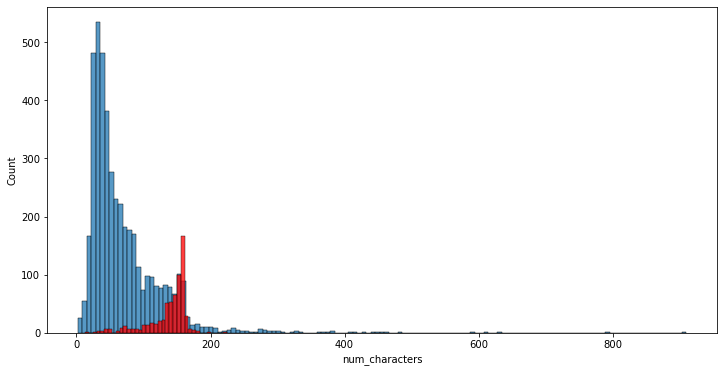

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_characters'])
sns.histplot(df[df['label'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

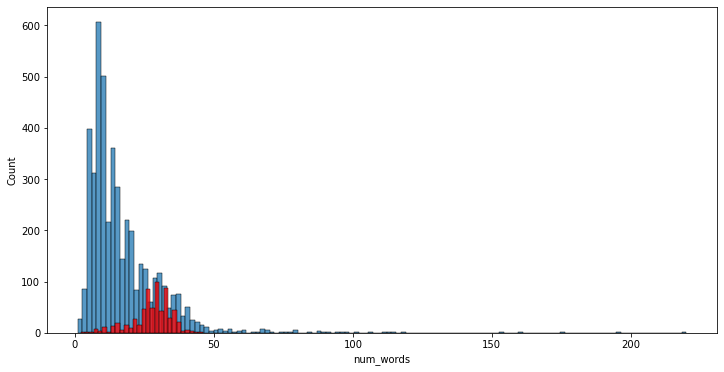

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_words'])
sns.histplot(df[df['label'] == 1]['num_words'],color='red')

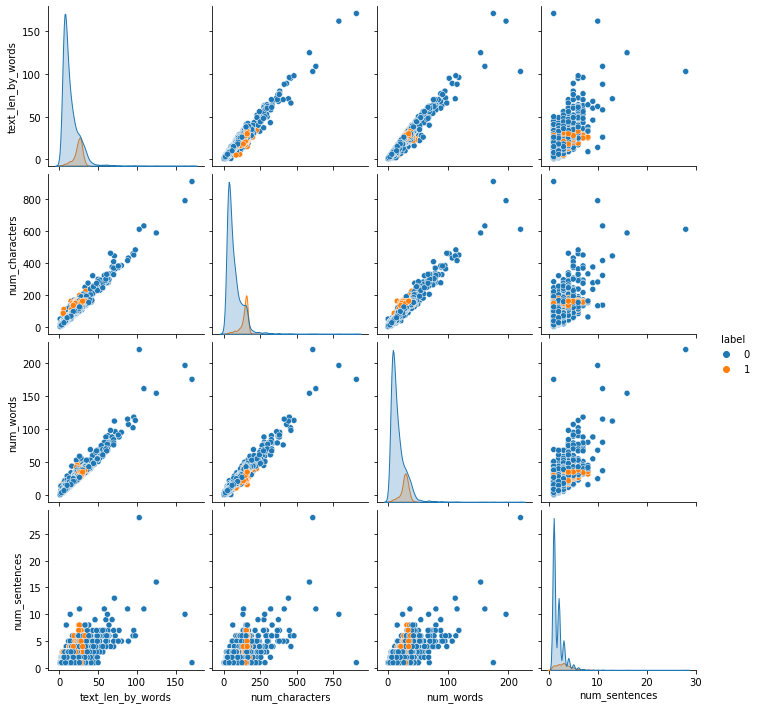

In [40]:
import seaborn as sns
sns.pairplot(df,hue='label')

<AxesSubplot:>

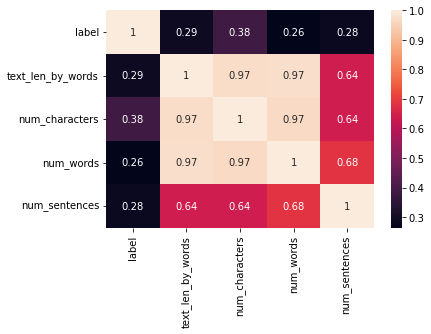

In [41]:
sns.heatmap(df.corr(),annot=True)

#### 3. Data preprocessing

In [42]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

+ lower case
+ tokenization
+ removing special characters
+ removing stopwords and punctuation
+ stemming


In [43]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)


In [44]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [45]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [46]:
ps.stem('loving')

'love'

In [47]:
df['transformed_text'] = df['text'].apply(transform_text)

In [48]:
df.head()

,label,text,text_len_by_words,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",20,111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,6,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,11,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",13,61,15,1,nah think goe usf live around though


In [49]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [50]:
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" "))

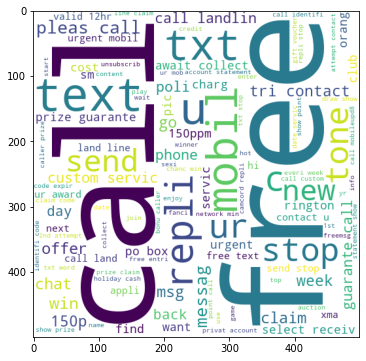

In [51]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [52]:
ham_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=" "))

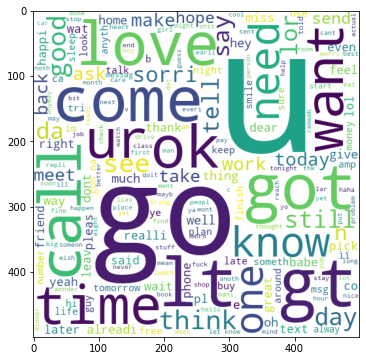

In [53]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [54]:
df.head(10)

,label,text,text_len_by_words,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",20,111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,6,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,11,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",13,61,15,1,nah think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,32,148,39,4,freemsg hey darl 3 week word back like fun sti...
6,0,Even my brother is not like to speak with me. ...,16,77,18,2,even brother like speak treat like aid patent
7,0,As per your request 'Melle Melle (Oru Minnamin...,26,160,31,2,per request mell oru minnaminungint nurungu ve...
8,1,WINNER!! As a valued network customer you have...,26,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,29,154,31,3,mobil 11 month u r entitl updat latest colour ...


In [55]:
spam_corpus=[]
for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [56]:
len(spam_corpus)

9939

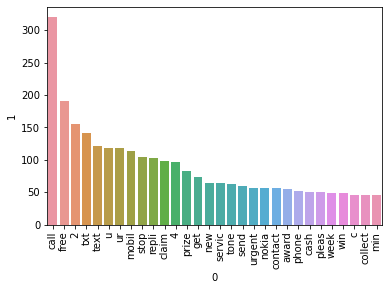

In [57]:
from  collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [58]:
ham_corpus = []
for msg in df[df['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [59]:
len(ham_corpus)

35394

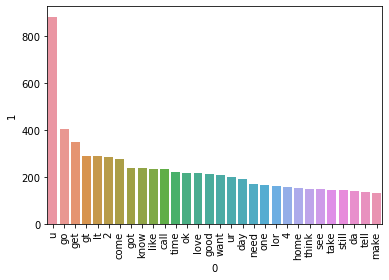

In [60]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

text vectorization by using bag of words

In [61]:
df.head()

,label,text,text_len_by_words,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",20,111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,6,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,11,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",13,61,15,1,nah think goe usf live around though


#### 4. Model Building

In [62]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [63]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [64]:
X.shape

(5169, 3000)

In [65]:
y=df['label'].values

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [68]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [69]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [70]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred1))
print(f"Confusion Matrix: \n {confusion_matrix(y_test,y_pred1)}\n")
print("Precision Score: ",precision_score(y_test,y_pred1))

Accuracy Score:  0.8694390715667312
Confusion Matrix: 
 [[788 108]
 [ 27 111]]

Precision Score:  0.5068493150684932


In [71]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred2))
print(f"Confusion Matrix: \n {confusion_matrix(y_test,y_pred2)}\n")
cm=confusion_matrix(y_test,y_pred2)
print("Precision Score: ",precision_score(y_test,y_pred2))

Accuracy Score:  0.9709864603481625
Confusion Matrix: 
 [[896   0]
 [ 30 108]]

Precision Score:  1.0


In [72]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred3))
print(f"Confusion Matrix: \n {confusion_matrix(y_test,y_pred3)}\n")
print("Precision Score: ",precision_score(y_test,y_pred3))

Accuracy Score:  0.9835589941972921
Confusion Matrix: 
 [[895   1]
 [ 16 122]]

Precision Score:  0.991869918699187


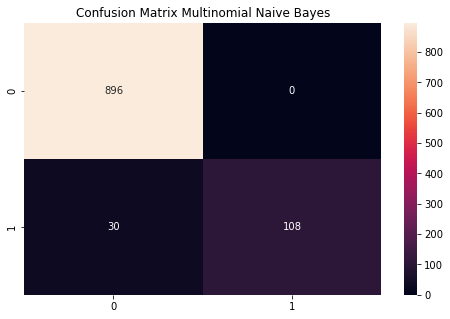

In [73]:
plt.figure(figsize=(8,5))
plt.title("Confusion Matrix Multinomial Naive Bayes")
sns.heatmap(cm,annot=True,fmt='g')
plt.show()

In [74]:
svc = SVC(kernel = 'sigmoid' , gamma=1.0)
knc = KNeighborsClassifier()
mnb=MultinomialNB()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [75]:
clfs={
    'SVC' : svc,
    'KNN' : knc,
    'MNB' : mnb,
    'BNB' : bnb,
    'DT'  :  dtc,
    'LR' : lrc,
    'RF' : rfc,
    'ABC' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [76]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy, precision

In [77]:
print("Train Classifier: ",train_classifier(svc,X_train,y_train,X_test,y_test))

Train Classifier:  (0.9758220502901354, 0.9747899159663865)


In [78]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KNN
Accuracy -  0.9052224371373307
Precision -  1.0
For  MNB
Accuracy -  0.9709864603481625
Precision -  1.0
For  BNB
Accuracy -  0.9835589941972921
Precision -  0.991869918699187
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  ABC
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8671875
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.92
For  xgb
Accuracy -  0.971953578336557
Precision -  0.943089430894309


In [79]:
performance_data=pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy' :accuracy_scores, 'Precision' : precision_scores}).sort_values('Precision' , ascending=False)
performance_data

,Algorithm,Accuracy,Precision
1,KNN,0.905222,1.000000
2,MNB,0.970986,1.000000
3,BNB,0.983559,0.991870
6,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
9,ETC,0.974855,0.974576
5,LR,0.958414,0.970297
11,xgb,0.971954,0.943089
7,ABC,0.960348,0.929204
10,GBDT,0.947776,0.920000


In [80]:
performance_data1=pd.melt(performance_data,id_vars="Algorithm")
performance_data1

,Algorithm,variable,value
0,KNN,Accuracy,0.905222
1,MNB,Accuracy,0.970986
2,BNB,Accuracy,0.983559
3,RF,Accuracy,0.974855
4,SVC,Accuracy,0.975822
5,ETC,Accuracy,0.974855
6,LR,Accuracy,0.958414
7,xgb,Accuracy,0.971954
8,ABC,Accuracy,0.960348
9,GBDT,Accuracy,0.947776


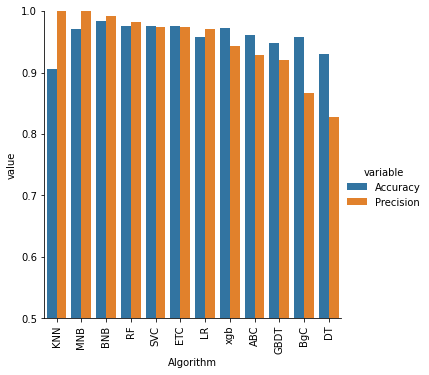

In [81]:
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_data1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [82]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000' :accuracy_scores,'Precision_max_ft_3000' : precision_scores}).sort_values('Precision_max_ft_3000' , ascending=False)

In [83]:
temp_df = pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy_scaling' : accuracy_scores,'Precision_scaling' :precision_scores}).sort_values('Precision_scaling' , ascending=False)

In [84]:
new_df=performance_data.merge(temp_df,on='Algorithm')

In [85]:
new_df_scaled=new_df.merge(temp_df,on='Algorithm')

In [86]:
temp_df=pd.DataFrame({'Algorithm' :clfs.keys(),'Accuracy_num_chars' : accuracy_scores,'Precision_num_chars' : precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [87]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KNN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,MNB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,BNB,0.983559,0.991870,0.983559,0.991870,0.983559,0.991870,0.983559,0.991870
3,RF,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759
4,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
5,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
6,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
7,xgb,0.971954,0.943089,0.971954,0.943089,0.971954,0.943089,0.971954,0.943089
8,ABC,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
9,GBDT,0.947776,0.920000,0.947776,0.920000,0.947776,0.920000,0.947776,0.920000


##### Applying stacking

In [88]:
estimators=[('svm',svc), ('nb' , mnb), ('bnb' , bnb)]
final_estimator = RandomForestClassifier()

In [89]:
from sklearn.ensemble import StackingClassifier
clf=StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [90]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy" , accuracy_score(y_test,y_pred))
print("Precision" , precision_score(y_test,y_pred))

Accuracy 0.9864603481624759
Precision 0.9696969696969697


#### Voting Classifier

In [91]:
svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc =ExtraTreesClassifier(n_estimators=50,random_state=2)
from sklearn.ensemble import VotingClassifier

In [92]:
voting = VotingClassifier(estimators=[('svm' , svc), ('nb' , mnb), ('bnb' , bnb)],voting='soft')

In [93]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()), ('bnb', BernoulliNB())],
                 voting='soft')

In [94]:
y_pred=voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision", precision_score(y_test,y_pred))

Accuracy 0.9835589941972921
Precision 1.0


In [95]:
conf_m=confusion_matrix(y_test,y_pred)

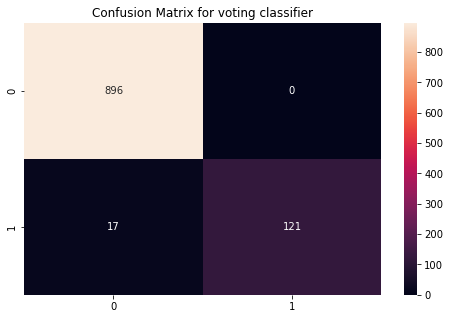

In [96]:
plt.figure(figsize=(8,5))
plt.title("Confusion Matrix for voting classifier")
sns.heatmap(conf_m,annot=True,fmt='g')
plt.show()

In [97]:
#serializing and de-serializing the structures
import pickle
pickle.dump(tfidf,open('vectorizer.pkl' , 'wb'))
pickle.dump(voting,open('model.pkl' , 'wb'))

In [98]:
prediction_text=transform_text("Hey, lets watch a movie tonight")
prediction_text=[prediction_text]
prediction = tfidf.transform(prediction_text).toarray()
prediction.reshape(1,-1)

array([[0., 0., 0., ..., 0., 0., 0.]])

In [99]:
voting.predict(prediction)

array([0])

# THANK YOU